In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from qutip import *
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import simpson
plt.rcParams.update({'font.size': 14})

In [2]:
def coper(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*adag
    c2=sqrt(const2)*a**2
    c3=sqrt(myu)*(adag*a-0.5*adag**2)
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
def hamil(N,omega,q0,myu):
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))
    return H
def retdiag(rho,N):
    rhoii=[]
    n=[]
    for i in range(N):
        rhoii.append(rho.diag())
        n.append(i+1)
    return n,rhoii
def retdens(H,cops,N):
    expop=rand_dm(N)
    times = np.linspace(0.0, 100.0, 10000)
    result_dm = mesolve(H, expop, times, cops)
    return result_dm.states    
def hamildriven(N,omega,q0,myu,n,omega1,epsilon,phi):
    T=2*np.pi/omega1
    t=np.linspace(0,1000,1000)
    t=t*T
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=[]
    for i in range (len(t)):
        H.append(omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))-(1j*epsilon*t[i]*(a+adag)))
    return H    
    #H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))-(cosine)
    
    return H
def Gauss(x, A, B, C):
    y = A*np.exp(-((x-B)/C)**2)
    return y

    
def linexp(x,A,alpha,mean):
    y=A*(x**2)*np.exp(-(alpha)*(x-mean)**2)
    #y=A*x
    return y
def probrec(myu,q0,diag):
    N=3000
    p=np.zeros(N)
    #p[0]=np.random.uniform(0,1)
    #p[1]=np.random.uniform(0,1)
    p[0]=0
    p[1]=diag[0]
    p[2]=diag[1]
    #p[2]=np.random.uniform(0,1)
    n=0
    for i in range(N-3):
        p[i+3]=-(4/(3*myu*(n+2)))*(((-myu*(q0**2-1))*p[i+1])+((3*myu/4)*(n*p[i+2]))-((myu/4)*(n*p[i]+(n+2)*p[i+1])))
        n+=1
        
    return p
    
    

In [3]:
q0=3
omega=1
N=30
a=destroy(N)
adag=a.dag()
x=np.linspace(-8,+8,1000)
p=np.linspace(-8,+8,1000)
times = np.linspace(0.0, 100.0, 10000)

In [4]:
myu=np.linspace(0.001,5,40)
H=[]
cops=[]
ss=[]
ex=[]

In [5]:
for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)


In [6]:
for i in range(len(myu)):
    ex.append(expect(adag*a,ss[i]))

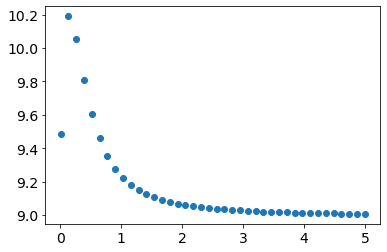

In [7]:
#plt.scatter(np.log(myu[1:]),np.log(ex[1:]))
plt.scatter(myu,ex)

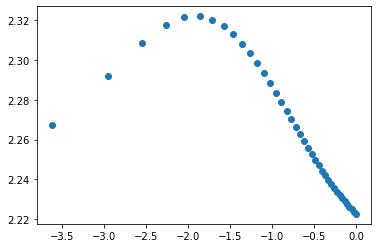

In [8]:
plt.scatter(np.log(myu[1:]),np.log(ex[1:]))

In [9]:
myu[ex.index(max(ex))]

0.15469230769230768

In [10]:
result_dm = mesolve(H[4], rand_dm(N), times, cops[4],adag*a)

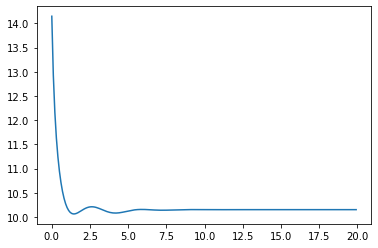

In [11]:
plt.plot(times[0:200],result_dm.expect[0][0:200])

In [12]:
myu

array([0.001     , 0.02661538, 0.05223077, 0.07784615, 0.10346154,
       0.12907692, 0.15469231, 0.18030769, 0.20592308, 0.23153846,
       0.25715385, 0.28276923, 0.30838462, 0.334     , 0.35961538,
       0.38523077, 0.41084615, 0.43646154, 0.46207692, 0.48769231,
       0.51330769, 0.53892308, 0.56453846, 0.59015385, 0.61576923,
       0.64138462, 0.667     , 0.69261538, 0.71823077, 0.74384615,
       0.76946154, 0.79507692, 0.82069231, 0.84630769, 0.87192308,
       0.89753846, 0.92315385, 0.94876923, 0.97438462, 1.        ])

In [13]:
q0=2
omega=1
N=30
a=destroy(N)
adag=a.dag()
x=np.linspace(-8,+8,1000)
p=np.linspace(-8,+8,1000)
times = np.linspace(0.0, 100.0, 1000)

myu=np.linspace(0.001,1,40)
H=[]
cops=[]
ss=[]
ex2=[]

for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)


for i in range(len(myu)):
    ex2.append(expect(adag*a,ss[i]))

In [14]:
q0=4
omega=1
N=30
a=destroy(N)
adag=a.dag()
x=np.linspace(-8,+8,1000)
p=np.linspace(-8,+8,1000)
times = np.linspace(0.0, 100.0, 1000)

myu=np.linspace(0.001,1,40)
H=[]
cops=[]
ss=[]
ex3=[]

for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)


for i in range(len(myu)):
    ex3.append(expect(adag*a,ss[i]))

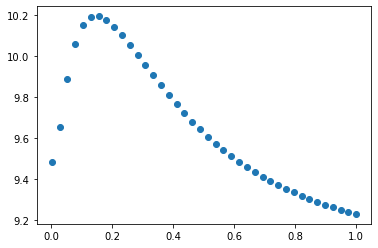

In [16]:
plt.scatter(myu,ex)
#plt.scatter(myu,ex2)
#plt.scatter(myu,ex3)

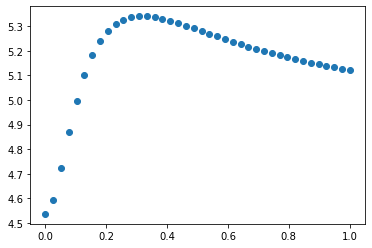

In [17]:
plt.scatter(myu,ex2)

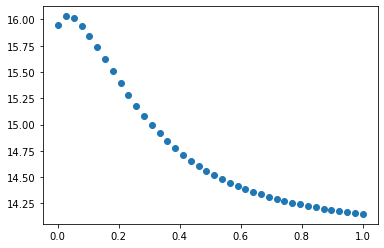

In [18]:
plt.scatter(myu,ex3)